# 3D Volume Preprocessing Visualization
This notebook allows you to visualize the result of the new center-crop/pad preprocessing for a given sample folder.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
sys.path.append("../4ncnn")
from data_utils import preprocess_sample

In [2]:
# Provide the folder path to your sample here
folder_path = "/mnt/home/dchhantyal/3d-cnn-classification/data/nuclei_state_dataset/david4epi_extracted/stable/David4EPI_frame_084_nucleus_013_count_24"  # <-- Change this to your sample folder path
output_path = "/mnt/home/dchhantyal/3d-cnn-classification/model/notebooks"

In [3]:

tensor = preprocess_sample(folder_path=folder_path,  save_analysis=True, analysis_output_dir = output_path)
print(tensor.shape)
# Remove batch dimension and convert to numpy
volume = tensor.squeeze(0).numpy()  # shape: (4, D, H, W)
print("Preprocessed volume shape:", volume.shape)

⚠️ Warning: t volume not found at /mnt/home/dchhantyal/3d-cnn-classification/data/nuclei_state_dataset/david4epi_extracted/stable/David4EPI_frame_084_nucleus_013_count_24/t/raw_cropped.tif. Using blank volume.
⚠️ Warning: File not found at /mnt/home/dchhantyal/3d-cnn-classification/data/nuclei_state_dataset/david4epi_extracted/stable/David4EPI_frame_084_nucleus_013_count_24/t-1/raw_cropped.tif. Using blank volume.
⚠️ Warning: File not found at /mnt/home/dchhantyal/3d-cnn-classification/data/nuclei_state_dataset/david4epi_extracted/stable/David4EPI_frame_084_nucleus_013_count_24/t/raw_cropped.tif. Using blank volume.
⚠️ Warning: File not found at /mnt/home/dchhantyal/3d-cnn-classification/data/nuclei_state_dataset/david4epi_extracted/stable/David4EPI_frame_084_nucleus_013_count_24/t+1/raw_cropped.tif. Using blank volume.
⚠️ Warning: Label file not found at /mnt/home/dchhantyal/3d-cnn-classification/data/nuclei_state_dataset/david4epi_extracted/stable/David4EPI_frame_084_nucleus_013_coun

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

💾 Saving preprocessing analysis to: /mnt/home/dchhantyal/3d-cnn-classification/model/notebooks/David4EPI_frame_084_nucleus_013_count_24
✅ Preprocessing analysis saved successfully!
torch.Size([1, 4, 64, 64, 64])
Preprocessed volume shape: (4, 64, 64, 64)
✅ Preprocessing analysis saved successfully!
torch.Size([1, 4, 64, 64, 64])
Preprocessed volume shape: (4, 64, 64, 64)


In [4]:
from tifffile import imread

label = imread("/mnt/home/dchhantyal/3d-cnn-classification/data/nuclei_state_dataset/v2/new_daughter/221016_FUCCI_Nanog_stack_3_frame_110_nucleus_038_count_4/t/binary_label_cropped.tif")

np.unique(np.mean(label, axis=0)).shape

(11,)

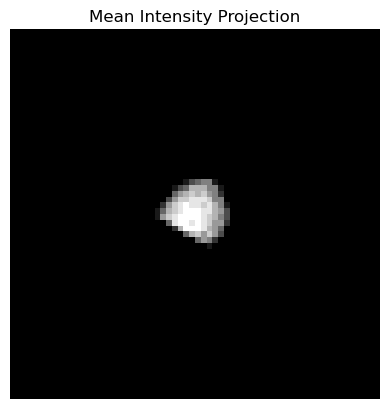

In [51]:
from matplotlib import pyplot as plt

plt.imshow(np.mean(volume[3], axis=0), cmap='gray')
plt.title("Mean Intensity Projection")
plt.axis('off')
plt.show()  

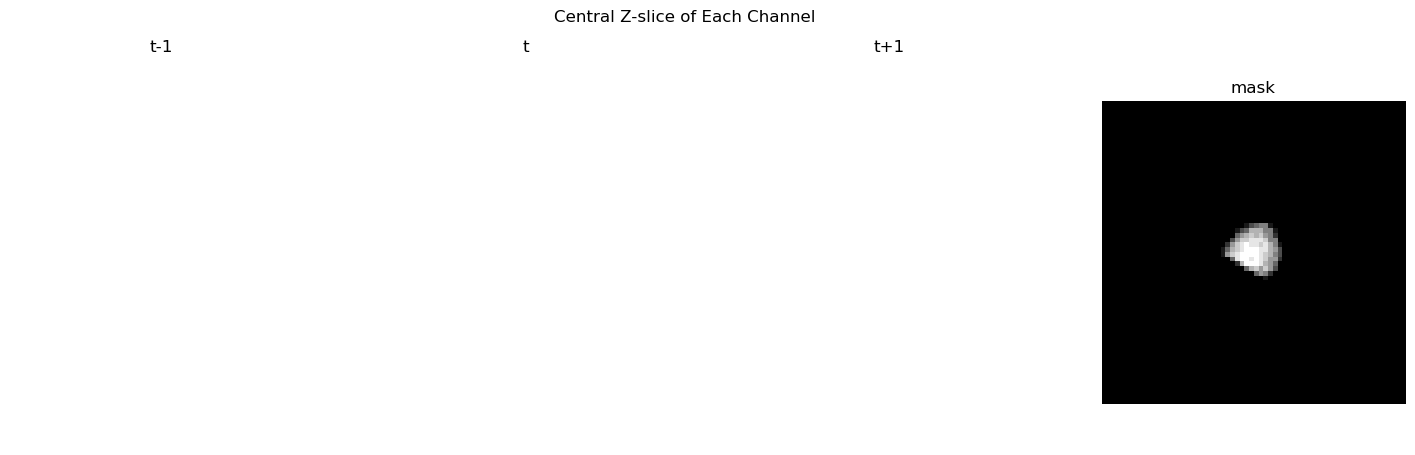

In [47]:
# Visualize central slices for each channel
channels = ['t-1', 't', 't+1', 'mask']
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
D, H, W = volume.shape[1:]
for i in range(4):
    # Show max projection for each channel
    ############################################################################
    plt.imshow(np.mean(volume[i], axis=0), cmap='gray')
    axes[i].set_title(channels[i])
    axes[i].axis('off')
plt.suptitle('Central Z-slice of Each Channel')
plt.show()

In [35]:
np.mean(volume[0], axis=0).shape

(64, 64)

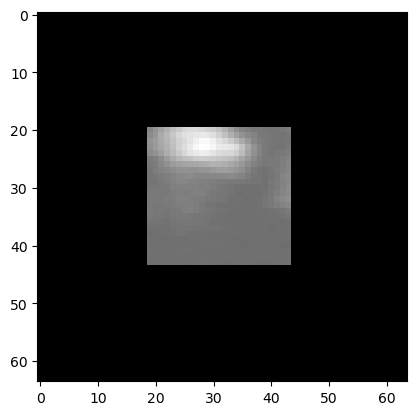

In [36]:
plt.imshow(np.mean(volume[0], axis=0), cmap='gray')